The purpose of this notebook is to investigate how taking small, random subsets of large population affects the betti curves.  Then we can compare with the results of the smaller populations.

In [9]:
import numpy as np
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt

from importlib import reload
import glob
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

reload(tpplt)

/home/brad/DailyLog/20171016/


<module 'neuraltda.plotting' from '/home/brad/code/NeuralTDA/neuraltda/plotting.py'>

In [2]:
# Set data and parameters
block_path = '/home/brad/krista/B1083/P03S03/'

# Binning Parameters
windt = 10.0             # milliseconds
dtovr = 0.5*windt        # milliseconds
segment_info = [0, 0]    # use full Trial
cluster_group = ['Good'] # use just good clusters
comment = 'BSPop'        # BootStrap Populations

# Betti Parameters
nperms_subsample = 1                  # 1 permutation for each trial
ncellsperm_subsample = 33             # Subsample 33 neurons from the population
nperms_full = 0                       # For the full population
dims = [0, 1, 2, 3]                   # We want first four betti numbers
thresh = 4.0                          # Activation threshold
twin = np.linspace(0, 6000, 1000)     # milliseconds

In [3]:
# Bin the data

bfdict = tp2.bin_data(block_path, windt, segment_info,
                      dt_overlap=dtovr, cluster_group=cluster_group, comment=comment)


In [4]:
# Compute Betti Curves

# Extract paths to binned data
analysis_id = bfdict['analysis_id']
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]

# Compute betti curves for subsample population
(betti_curves_subsample, t_vals, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                  thresh, nperms_subsample, ncellsperm_subsample,
                                                  dims, twin, windt, dtovr)

# Compute betti curves for full population
(betti_curves_full, t_vals, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                             thresh, nperms_full, ncellsperm_subsample,
                                             dims, twin, windt, dtovr)

In [29]:
# Plot full versus subsampled population betti curves
# This serves as a useful template for betti curve plottinggg

betti = 2                          # Betti number to plot
stims = np.array(list(betti_curves_subsample.keys()))  # Stimuli names
stimIDs = [2, 3]                   # ID numbers of stimuli to plot
stims_to_plot = stims[stimIDs]     # names of stimuli to plot

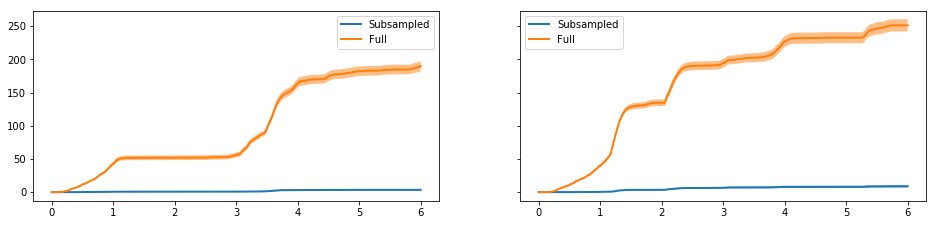

In [30]:
# Generate figure and axes
fig, axs = plt.subplots(1,2, figsize=(16, 3.5), sharey=True)
axs = axs.flatten()
# Compute the mean and stderr
bcsub_plot_dict = tp2.compute_mean_stderr_betti_curves(betti_curves_subsample)     # Real curves 
bcf_plot_dict = tp2.compute_mean_stderr_betti_curves(betti_curves_full)   # Shuffled curves 

# Plot the curves
for ind, stim in enumerate(stims_to_plot):
    ax = axs[ind]
    subsamp, = tpplt.plot_betti_curve(bcsub_plot_dict, t_ms, stim, betti, ax)
    fulldat, = tpplt.plot_betti_curve(bcf_plot_dict, t_ms, stim, betti, ax)
    ax.legend((subsamp, fulldat), ('Subsampled', 'Full'))
tpplt.save_fig(fig, figsavepth, 'FullvsSubsampledB1083_2stims_betti{}'.format(betti))

In [31]:
# Compare subsampled large N bird to small N bird (B1075)
block_path_B1075 = '/home/brad/krista/B1075/P01S03/'

bfdict = tp2.bin_data(block_path_B1075, windt, segment_info,
                      dt_overlap=dtovr, cluster_group=cluster_group, comment=comment)


analysis_id = bfdict['analysis_id']
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]

# Compute betti curves for full population for B1075
(betti_curves_full_B1075, t_vals, t_ms) = tp2.compute_betti_curves(analysis_id, block_path_B1075, bdf,
                                             thresh, nperms_full, ncellsperm_subsample,
                                             dims, twin, windt, dtovr)

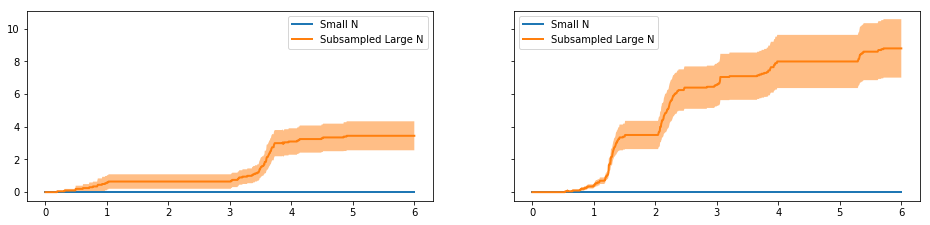

In [32]:
# Compute the mean and stderr
bcf_plot_dict_B1075 = tp2.compute_mean_stderr_betti_curves(betti_curves_full_B1075)

# Generate figure and axes
fig, axs = plt.subplots(1,2, figsize=(16, 3.5), sharey=True)
axs = axs.flatten()

# Plot the curves
for ind, stim in enumerate(stims_to_plot):
    ax = axs[ind]
    B1075_lines, = tpplt.plot_betti_curve(bcf_plot_dict_B1075, t_ms, stim, betti, ax)
    B1083_lines, = tpplt.plot_betti_curve(bcsub_plot_dict, t_ms, stim, betti, ax)
    ax.legend((B1075_lines, B1083_lines), ('Small N', 'Subsampled Large N'))
tpplt.save_fig(fig, figsavepth, 'B1083vsB1074_2stims_betti{}'.format(betti))

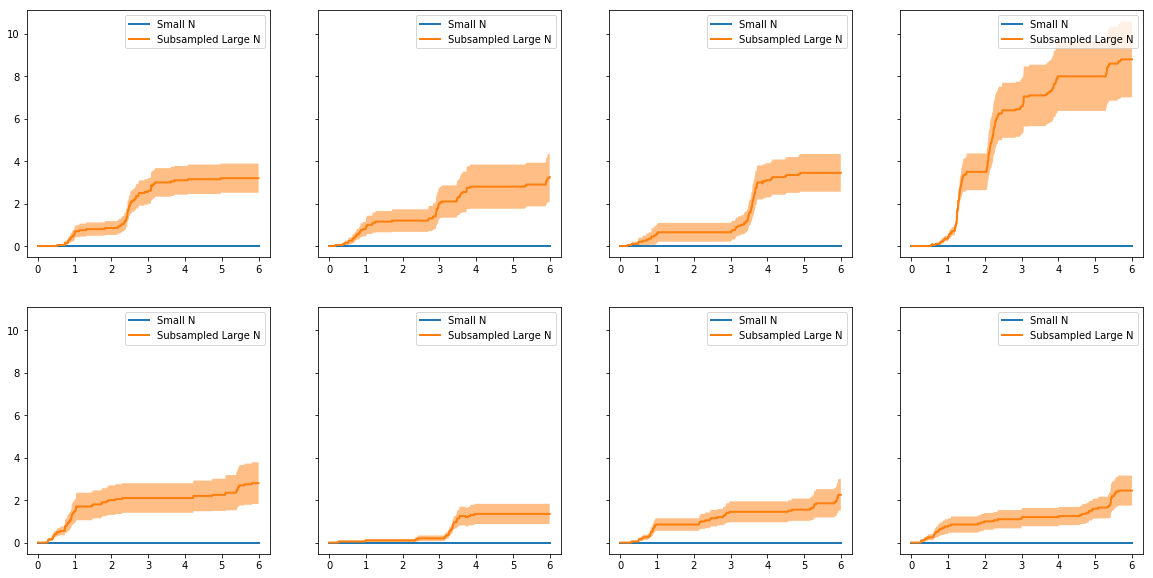

In [33]:
# Plot all stimuli from the Large N and Small N birds

# Generate figure and axes
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
axs = axs.flatten()

# Get the stimuli
all_stims = list(bcsub_plot_dict.keys())

# Plot the curves
for ind, stim in enumerate(all_stims):
    ax = axs[ind]
    B1075_lines, = tpplt.plot_betti_curve(bcf_plot_dict_B1075, t_ms, stim, betti, ax)
    B1083_lines, = tpplt.plot_betti_curve(bcsub_plot_dict, t_ms, stim, betti, ax)
    ax.legend((B1075_lines, B1083_lines), ('Small N', 'Subsampled Large N'))
tpplt.save_fig(fig, figsavepth, 'B1083vsB1075_allstims_betti{}'.format(betti))